<a href="https://colab.research.google.com/github/laks58/Movie-recommendation-System-/blob/main/Movie_Recomendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("/content/netflix_data.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.dropna(inplace=True)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
le = LabelEncoder()

df['type'] = le.fit_transform(df['type'])
df['country'] = le.fit_transform(df['country'])
df['rating'] = le.fit_transform(df['rating'])
df['release_year'] = df['release_year'].astype(int)


In [ ]:
X = df[['release_year', 'country', 'rating']]  # Input features
y = df['type']  # Target output


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=3, activation='relu'))  # Hidden layer 1
model.add(Dense(8, activation='relu'))                # Hidden layer 2
model.add(Dense(1, activation='sigmoid'))             # Output layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9059 - loss: 0.4859 - val_accuracy: 0.9707 - val_loss: 0.1871
Epoch 2/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9748 - loss: 0.1469 - val_accuracy: 0.9707 - val_loss: 0.1270
Epoch 3/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.1115 - val_accuracy: 0.9707 - val_loss: 0.1244
Epoch 4/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - loss: 0.1071 - val_accuracy: 0.9707 - val_loss: 0.1234
Epoch 5/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 0.1229 - val_accuracy: 0.9707 - val_loss: 0.1233
Epoch 6/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.1008 - val_accuracy: 0.9707 - val_loss: 0.1221
Epoch 7/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.1113 - val_accuracy: 0.9707 - val_loss: 0.1216
Epoch 8/50
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9773 - loss: 0.0942 - val_accuracy: 0.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("✅ Test Accuracy:", accuracy)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9730 - loss: 0.1138
✅ Test Accuracy: 0.9700093865394592


In [ ]:
# Example: Predict for release_year=2021, country=15, rating=3
sample = scaler.transform([[2021, 15, 3]])
prediction = model.predict(sample)
print("Prediction (0 = TV Show, 1 = Movie):", int(prediction[0][0] > 0.5))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Prediction (0 = TV Show, 1 = Movie): 0


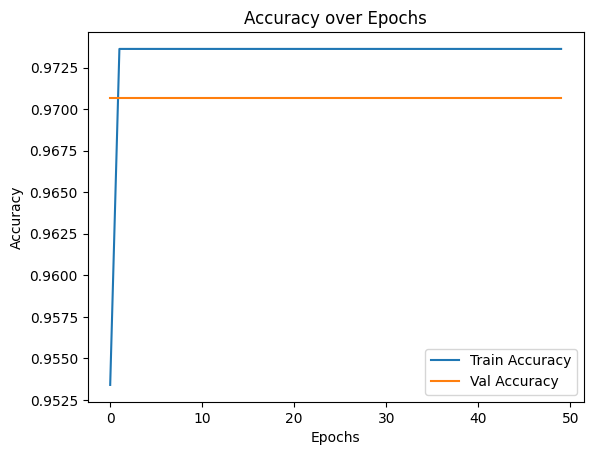

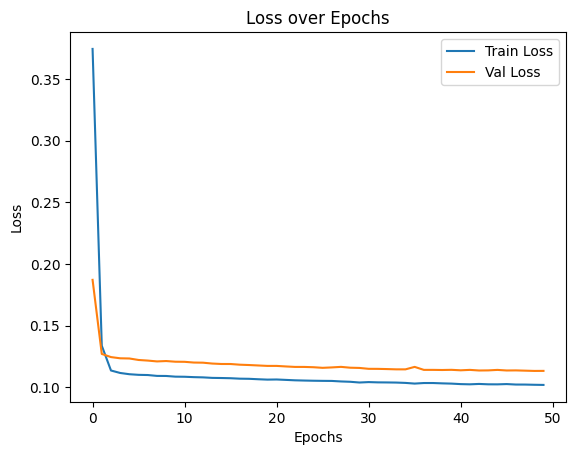

In [ ]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


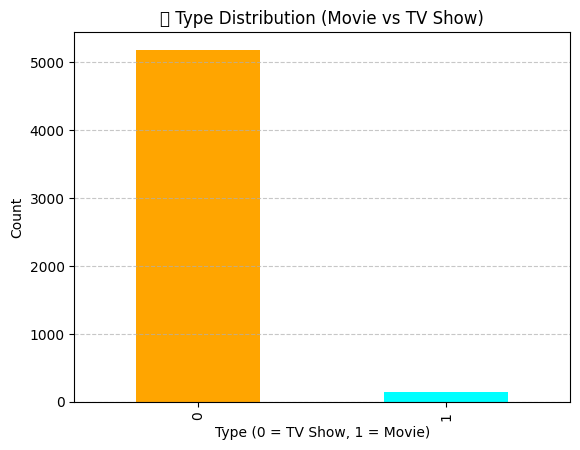

In [ ]:
# Bar chart for number of Movies vs TV Shows
df['type'].value_counts().plot(kind='bar', color=['orange', 'cyan'])
plt.title('📺 Type Distribution (Movie vs TV Show)')
plt.xlabel('Type (0 = TV Show, 1 = Movie)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


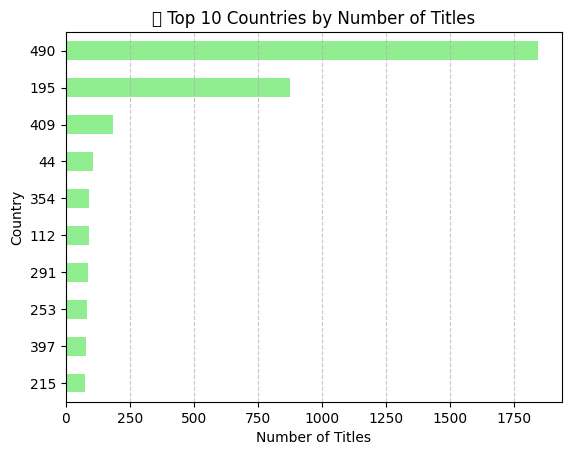

In [ ]:
# Top 10 countries with most titles
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='lightgreen')
plt.title('🌍 Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


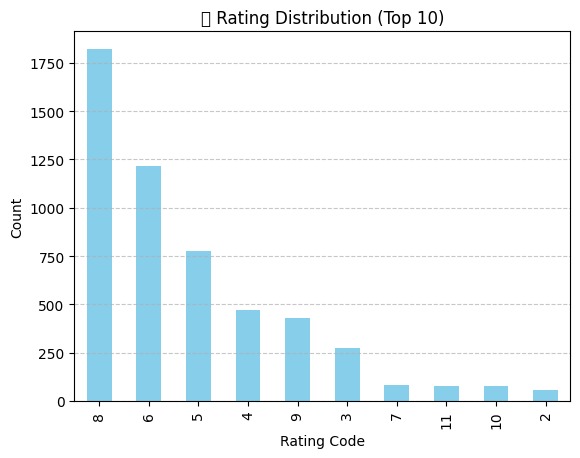

In [ ]:
# Ratings distribution
df['rating'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('🔢 Rating Distribution (Top 10)')
plt.xlabel('Rating Code')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Import seaborn for the heatmap
import seaborn as sns


In [ ]:
# Create a correlation matrix of numerical columns
correlation_matrix = df[['release_year', 'country', 'rating', 'type']].corr()


In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


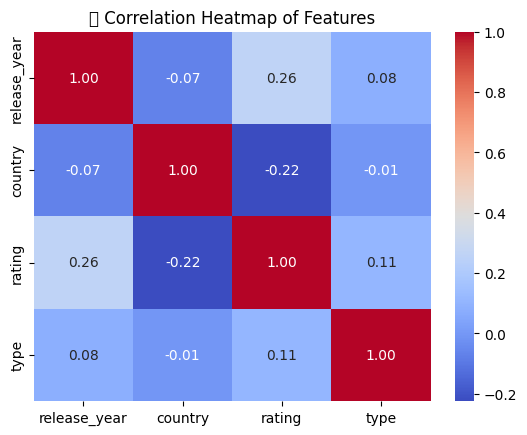

In [ ]:
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Set the title
plt.title("🧠 Correlation Heatmap of Features")
# Display the heatmap
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can try k=3,5,7 later


In [ ]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)


In [ ]:
print("✅ KNN Test Accuracy:", knn_accuracy)


✅ KNN Test Accuracy: 0.9671977507029054


In [ ]:
print("📘 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("📘 Classification Report:\n", classification_report(y_test, y_pred_knn))


📘 Confusion Matrix:
 [[1032    3]
 [  32    0]]
📘 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1035
           1       0.00      0.00      0.00        32

    accuracy                           0.97      1067
   macro avg       0.48      0.50      0.49      1067
weighted avg       0.94      0.97      0.95      1067



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


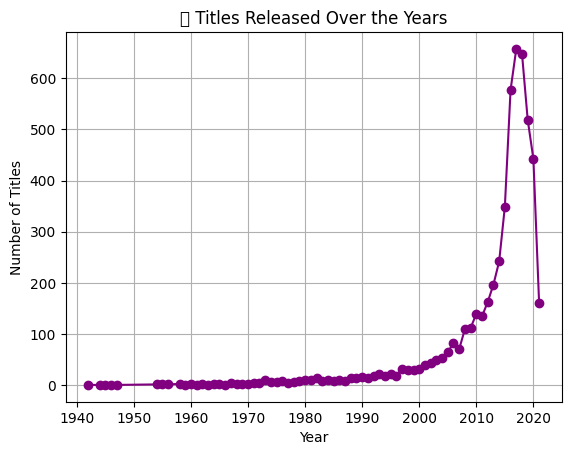

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='purple')
plt.title('📅 Titles Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


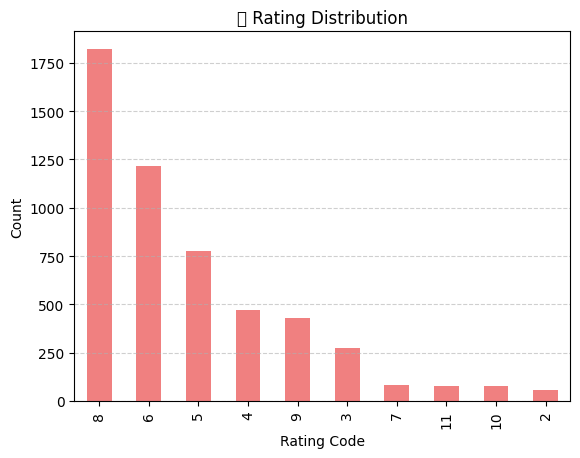

In [ ]:
df['rating'].value_counts().head(10).plot(kind='bar', color='lightcoral')
plt.title('🔢 Rating Distribution')
plt.xlabel('Rating Code')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


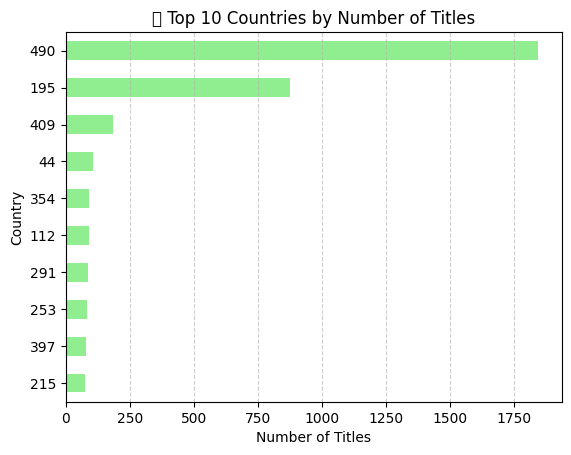

In [ ]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='lightgreen')
plt.title('🌍 Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


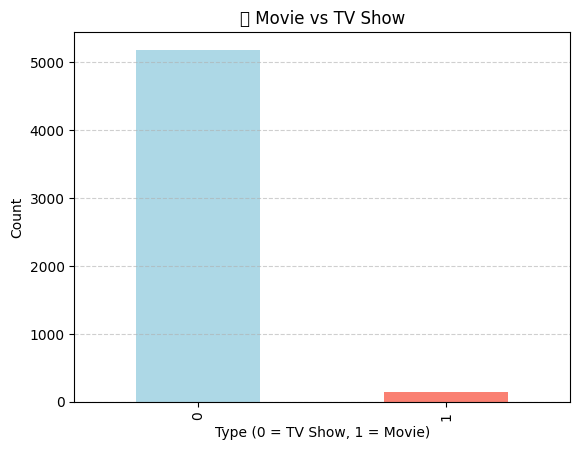

In [ ]:
df['type'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('🎬 Movie vs TV Show')
plt.xlabel('Type (0 = TV Show, 1 = Movie)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
